In [1]:
#import required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data
MAX_ROWs = 10000

#Load Train data
train_identity_df = pd.read_csv("../data/raw/train_identity.csv", nrows = MAX_ROWs)
train_transaction_df = pd.read_csv("../data/raw/train_transaction.csv", nrows = MAX_ROWs)

#Load Test data
test_identity_df = pd.read_csv("../data/raw/test_identity.csv", nrows = MAX_ROWs)
test_transaction_df = pd.read_csv("../data/raw/test_transaction.csv", nrows = MAX_ROWs)


In [3]:
#check data for transaction
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("Credit Card Fraud Detection data set of transaction -  rows:",train_transaction_df.shape[0]," columns:", train_transaction_df.shape[1])

Credit Card Fraud Detection data set of transaction -  rows: 10000  columns: 394


In [5]:
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,9881.000000,9999.000000,9978.000000,9087.000000,9087.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,2.992000e+06,0.026500,186909.442000,131.532165,9825.539700,349.267483,152.733973,200.322008,292.443711,87.006933,...,0.120578,39.289531,56.861372,46.033213,1.405054,12.217329,4.773285,12.339350,16.777617,13.411552
std,2.886896e+03,0.160625,56572.671722,215.136534,4776.768939,157.779179,10.195412,39.085677,103.678309,0.249711,...,0.504935,247.144816,280.207885,257.257797,10.527619,79.178968,41.864604,85.790571,110.710623,90.006645
min,2.987000e+06,0.000000,86400.000000,1.896000,1011.000000,100.000000,100.000000,100.000000,110.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.989500e+06,0.000000,146628.750000,44.000000,6381.000000,194.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.992000e+06,0.000000,171644.000000,74.950000,9500.000000,327.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.994499e+06,0.000000,240112.000000,131.058000,13780.000000,500.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.996999e+06,1.000000,313121.000000,3247.910000,18390.000000,600.000000,225.000000,237.000000,536.000000,96.000000,...,6.000000,6300.000000,6300.000000,6300.000000,150.000000,1300.000000,1300.000000,1500.000000,1630.000000,1500.000000


In [6]:
numericCols = train_transaction_df._get_numeric_data().columns
categoricalCols = list(set(train_transaction_df) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)
print('The numerical columns in training data are: ',numericCols)

The categorical columns in training data are:  ['card6', 'M1', 'M4', 'card4', 'M2', 'M8', 'M3', 'M7', 'P_emaildomain', 'M5', 'M9', 'R_emaildomain', 'M6', 'ProductCD']
The numerical columns in training data are:  Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)


In [7]:
#Check missing data for transaction dataset
total = train_transaction_df.isnull().sum().sort_values(ascending = False)
percent = (train_transaction_df.isnull().sum()/train_transaction_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,D7,D13,dist2,D12,D14,D6,D9,D8,V143,V156,...,V110,V111,V112,V113,V114,V115,C4,C5,C6,TransactionID
Total,9777.00,9720.0,9622.00,9594.00,9550.0,9509.00,8900.0,8900.0,8618.00,8618.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,97.77,97.2,96.22,95.94,95.5,95.09,89.0,89.0,86.18,86.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#check data for identity dataset
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
print("Credit Card Fraud Detection data set of identity -  rows:",train_identity_df.shape[0]," columns:", train_identity_df.shape[1])

Credit Card Fraud Detection data set of identity -  rows: 10000  columns: 41


In [10]:
train_identity_df.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.000000e+04,10000.000000,9750.000000,4579.000000,4579.000000,9479.000000,9479.000000,359.000000,359.000000,5394.000000,...,9664.000000,2917.000000,9664.000000,9661.000000,356.000000,360.000000,332.000000,359.000000,360.000000,6836.000000
mean,3.006248e+06,-8.047200,135539.437026,0.098930,-0.074689,1.873615,-5.940395,13.164345,-39.506964,0.144049,...,180.751242,13.992458,362.886072,391.120070,430.553371,15.369444,13.075301,338.348189,152.558333,26.505559
std,9.699861e+03,13.671623,125720.300245,0.679248,0.758879,5.242873,16.160213,10.523889,28.826670,1.080745,...,27.118625,1.468909,146.623861,152.850582,219.355561,5.702432,2.061822,114.884585,31.891039,3.738269
min,2.987004e+06,-100.000000,1120.000000,-9.000000,-13.000000,-30.000000,-100.000000,-16.000000,-100.000000,-22.000000,...,100.000000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,102.000000,100.000000,16.000000
25%,2.998165e+06,-5.000000,52055.500000,0.000000,0.000000,0.000000,-4.000000,4.000000,-50.000000,0.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,315.500000,121.000000,24.000000
50%,3.007364e+06,-5.000000,99010.000000,0.000000,0.000000,0.000000,0.000000,14.000000,-33.000000,0.000000,...,166.000000,15.000000,352.000000,401.000000,291.500000,14.000000,15.000000,321.000000,161.000000,24.000000
75%,3.014634e+06,0.000000,176180.250000,0.000000,0.000000,1.000000,0.000000,21.000000,-19.500000,0.000000,...,225.000000,15.000000,492.000000,533.000000,596.000000,14.000000,15.000000,426.000000,182.000000,32.000000
max,3.021387e+06,0.000000,998295.000000,9.000000,0.000000,52.000000,0.000000,39.000000,0.000000,14.000000,...,225.000000,26.000000,670.000000,638.000000,853.000000,41.000000,16.000000,533.000000,216.000000,32.000000


In [11]:
numericCols = train_identity_df._get_numeric_data().columns
categoricalCols = list(set(train_identity_df) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)
print('The numerical columns in training data are: ',numericCols)

The categorical columns in training data are:  ['id_31', 'id_34', 'id_37', 'id_30', 'id_38', 'id_16', 'id_36', 'id_23', 'id_27', 'DeviceInfo', 'id_29', 'id_33', 'DeviceType', 'id_12', 'id_35', 'id_28', 'id_15']
The numerical columns in training data are:  Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17',
       'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
       'id_32'],
      dtype='object')


In [12]:
#Check missing data for identity dataset
total = train_identity_df.isnull().sum().sort_values(ascending = False)
percent = (train_identity_df.isnull().sum()/train_identity_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,id_24,id_21,id_08,id_07,id_25,id_26,id_27,id_23,id_22,id_18,...,id_11,id_02,id_35,id_36,id_37,id_38,DeviceType,id_01,id_12,TransactionID
Total,9668.00,9644.00,9641.00,9641.00,9641.00,9640.0,9640.0,9640.0,9640.0,7083.00,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,0.0,0.0,0.0
Percent,96.68,96.44,96.41,96.41,96.41,96.4,96.4,96.4,96.4,70.83,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,0.0,0.0,0.0


In [69]:
#there are many columns and some of them contains maximum null values, So we take some columns
trans_column = ['isFraud','TransactionAmt','ProductCD','card4','P_emaildomain','C1','C2','D4','V12','V13']
id_column = ['id_01','id_02','id_05','id_06']

In [70]:
df_train_trans = train_transaction_df[trans_column].copy()
df_train_trans.describe()

,isFraud,TransactionAmt,C1,C2,D4,V12,V13
count,10000.000000,10000.000000,10000.000000,10000.00000,3769.000000,8734.000000,8734.000000
mean,0.026500,131.532165,8.404800,7.93480,167.726453,0.404168,0.440463
std,0.160625,215.136534,34.574136,34.40794,179.498190,0.501833,0.524728
min,0.000000,1.896000,0.000000,0.00000,-122.000000,0.000000,0.000000
25%,0.000000,44.000000,1.000000,1.00000,0.000000,0.000000,0.000000
50%,0.000000,74.950000,1.000000,1.00000,88.000000,0.000000,0.000000
75%,0.000000,131.058000,3.000000,3.00000,338.000000,1.000000,1.000000
max,1.000000,3247.910000,735.000000,808.00000,657.000000,3.000000,3.000000


In [71]:
df_train_identity = train_identity_df[id_column].copy()
df_train_identity.describe()

,id_01,id_02,id_05,id_06
count,10000.000000,9750.000000,9479.000000,9479.000000
mean,-8.047200,135539.437026,1.873615,-5.940395
std,13.671623,125720.300245,5.242873,16.160213
min,-100.000000,1120.000000,-30.000000,-100.000000
25%,-5.000000,52055.500000,0.000000,-4.000000
50%,-5.000000,99010.000000,0.000000,0.000000
75%,0.000000,176180.250000,1.000000,0.000000
max,0.000000,998295.000000,52.000000,0.000000


In [72]:
#Join Transaction and Identity dataset
train_df = df_train_trans.merge(df_train_identity, how='left', left_index=True, right_index=True)

In [73]:
train_df.head()

,isFraud,TransactionAmt,ProductCD,card4,P_emaildomain,C1,C2,D4,V12,V13,id_01,id_02,id_05,id_06
0,0,68.5,W,discover,NaN,1.0,1.0,NaN,1.0,1.0,0.0,70787.0,NaN,NaN
1,0,29.0,W,mastercard,gmail.com,1.0,1.0,0.0,0.0,0.0,-5.0,98945.0,0.0,-5.0
2,0,59.0,W,visa,outlook.com,1.0,1.0,0.0,1.0,1.0,-5.0,191631.0,0.0,0.0
3,0,50.0,W,mastercard,yahoo.com,2.0,5.0,94.0,1.0,1.0,-5.0,221832.0,0.0,-6.0
4,0,50.0,H,mastercard,gmail.com,1.0,1.0,NaN,NaN,NaN,0.0,7460.0,1.0,0.0


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isFraud         10000 non-null  int64  
 1   TransactionAmt  10000 non-null  float64
 2   ProductCD       10000 non-null  object 
 3   card4           9999 non-null   object 
 4   P_emaildomain   7895 non-null   object 
 5   C1              10000 non-null  float64
 6   C2              10000 non-null  float64
 7   D4              3769 non-null   float64
 8   V12             8734 non-null   float64
 9   V13             8734 non-null   float64
 10  id_01           10000 non-null  float64
 11  id_02           9750 non-null   float64
 12  id_05           9479 non-null   float64
 13  id_06           9479 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.1+ MB


In [75]:
train_df.isnull().sum()

isFraud              0
TransactionAmt       0
ProductCD            0
card4                1
P_emaildomain     2105
C1                   0
C2                   0
D4                6231
V12               1266
V13               1266
id_01                0
id_02              250
id_05              521
id_06              521
dtype: int64

In [76]:
#clean columns
#function to clean columns containing numerical values
def impute_median(df, column_name):
    median_value = df[~df[column_name].astype(str).str.contains('NA')][column_name].astype(float).median()
    df.loc[df[column_name].astype(str).str.contains('NA'), column_name] = median_value
    df[column_name] = df[column_name].fillna(median_value)
    
    return df

#clean column D4
train_df = impute_median(train_df, 'D4')

#clean column V12
train_df = impute_median(train_df, 'V12')

#clean column V13
train_df = impute_median(train_df, 'V13')

#clean column id_02
train_df = impute_median(train_df, 'id_02')

#clean column id_05
train_df = impute_median(train_df, 'id_05')

#clean column id_06
train_df = impute_median(train_df, 'id_06')


In [77]:
train_df.isnull().sum()

isFraud              0
TransactionAmt       0
ProductCD            0
card4                1
P_emaildomain     2105
C1                   0
C2                   0
D4                   0
V12                  0
V13                  0
id_01                0
id_02                0
id_05                0
id_06                0
dtype: int64

In [78]:
#Clean categorical columns
#train_df['card4'].value_counts()
train_df['card4'] = train_df['card4'].fillna('visa')

In [79]:
#clean column P_emaildomain
#train_df['P_emaildomain'].value_counts()
train_df['P_emaildomain'] = train_df['P_emaildomain'].fillna('gmail.com')

In [24]:
#Clean column R_emaildomain
#train_df['R_emaildomain'].value_counts()
#train_df['R_emaildomain'] = train_df['R_emaildomain'].fillna('gmail.com')

In [25]:
#clean column DeviceType
#train_df['DeviceType'].value_counts()
#train_df['DeviceType'] = train_df['DeviceType'].fillna('desktop')

In [26]:
#clean column DeviceInfo
#train_df['DeviceInfo'].value_counts()
#train_df['DeviceInfo'] = train_df['DeviceInfo'].fillna('Windows')

In [80]:
train_df.isnull().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card4             0
P_emaildomain     0
C1                0
C2                0
D4                0
V12               0
V13               0
id_01             0
id_02             0
id_05             0
id_06             0
dtype: int64

In [81]:
train_df.shape

(10000, 14)

In [82]:
#remove duplicates
train_df.drop_duplicates(inplace=True)

In [83]:
train_df.shape

(9996, 14)

In [84]:
#Data exploration
train_df['isFraud'].value_counts()

isFraud
0    9731
1     265
Name: count, dtype: int64

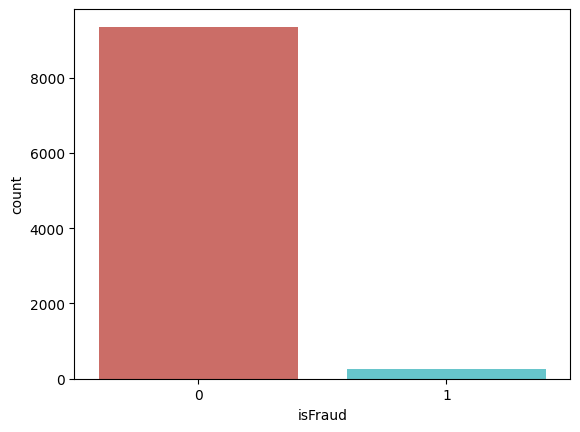

In [32]:
sns.countplot(x = 'isFraud', data = train_df, palette='hls', )
plt.show()

In [85]:
count_no_fraud = len(train_df[train_df['isFraud']==0])
count_fraud = len(train_df[train_df['isFraud']==1])
pct_of_no_fraud = count_no_fraud/(count_no_fraud + count_fraud)
print("percentage of not fraud transaction is", pct_of_no_fraud*100)
pct_of_sub = count_fraud/(count_no_fraud + count_fraud)
print("percentage of fraud transaction is", pct_of_sub*100)

percentage of not fraud transaction is 97.34893957583033
percentage of fraud transaction is 2.651060424169668


In [86]:
train_df.groupby('isFraud').mean(numeric_only=True)

,TransactionAmt,C1,C2,D4,V12,V13,id_01,id_02,id_05,id_06
isFraud,,,,,,,,,,
0,131.065030,8.354023,7.846881,118.843901,0.353201,0.384853,-8.034837,134506.407975,1.778851,-5.622649
1,149.825823,10.377358,11.264151,89.309434,0.350943,0.384906,-8.396226,139562.698113,1.698113,-6.018868


Text(0, 0.5, 'No. of transaction')

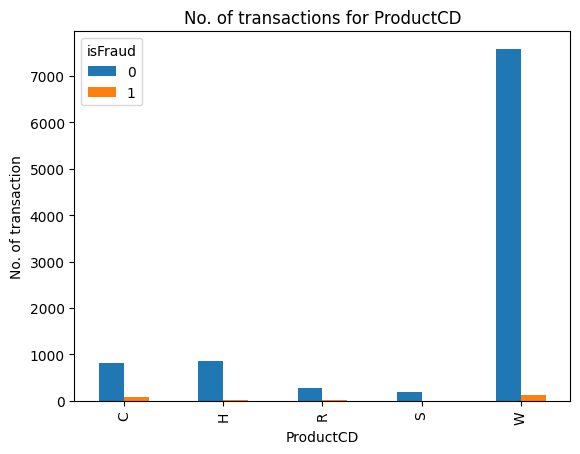

In [87]:
#Visualization
%matplotlib inline
pd.crosstab(train_df.ProductCD,train_df.isFraud).plot(kind='bar')
plt.title('No. of transactions for ProductCD')
plt.xlabel('ProductCD')
plt.ylabel('No. of transaction')
#plt.savefig('purchase_fre_job')

Text(0, 0.5, 'No. of transaction')

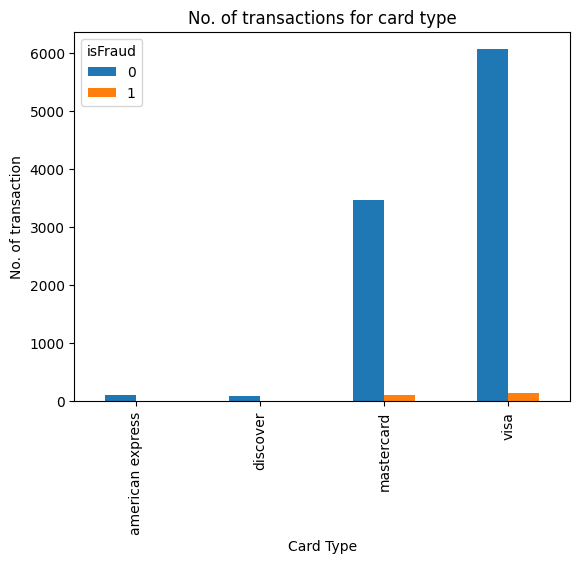

In [88]:
%matplotlib inline
pd.crosstab(train_df.card4,train_df.isFraud).plot(kind='bar')
plt.title('No. of transactions for card type')
plt.xlabel('Card Type')
plt.ylabel('No. of transaction')
#plt.savefig('purchase_fre_job')

Text(0, 0.5, 'No. of transaction')

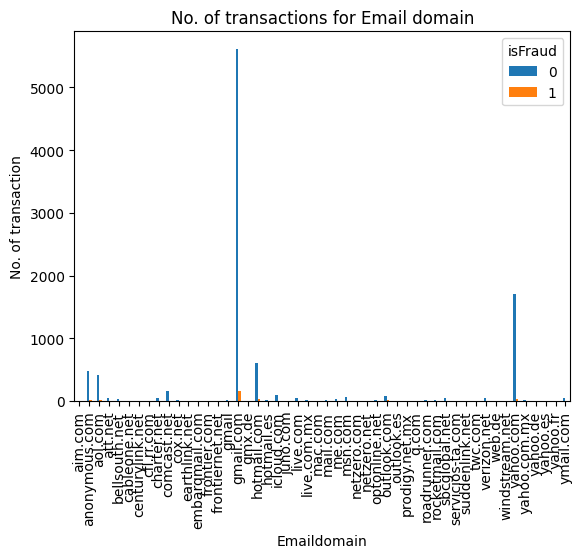

In [89]:
%matplotlib inline
pd.crosstab(train_df.P_emaildomain,train_df.isFraud).plot(kind='bar')
plt.title('No. of transactions for Email domain')
plt.xlabel('Emaildomain')
plt.ylabel('No. of transaction')
#plt.savefig('purchase_fre_job')


In [90]:
train_df.corr(numeric_only=True)

,isFraud,TransactionAmt,C1,C2,D4,V12,V13,id_01,id_02,id_05,id_06
isFraud,1.000000,0.014007,0.009400,0.015953,-0.040628,-0.000743,0.000017,-0.004246,0.006536,-0.002532,-0.004031
TransactionAmt,0.014007,1.000000,-0.030669,-0.032621,-0.014019,0.035611,0.028828,-0.018561,-0.010068,-0.012445,0.001259
C1,0.009400,-0.030669,1.000000,0.987060,0.088348,0.035656,0.035333,0.007947,-0.010091,-0.014579,0.012197
C2,0.015953,-0.032621,0.987060,1.000000,0.075578,0.024321,0.023978,0.007921,-0.008008,-0.013213,0.010849
D4,-0.040628,-0.014019,0.088348,0.075578,1.000000,0.003252,0.012343,-0.012770,0.006040,-0.013022,0.005065
V12,-0.000743,0.035611,0.035656,0.024321,0.003252,1.000000,0.939259,-0.002942,0.000333,-0.002153,0.001987
V13,0.000017,0.028828,0.035333,0.023978,0.012343,0.939259,1.000000,-0.004734,0.002164,-0.007213,0.001173
id_01,-0.004246,-0.018561,0.007947,0.007921,-0.012770,-0.002942,-0.004734,1.000000,-0.109266,-0.028138,0.238659
id_02,0.006536,-0.010068,-0.010091,-0.008008,0.006040,0.000333,0.002164,-0.109266,1.000000,-0.056914,-0.023518
id_05,-0.002532,-0.012445,-0.014579,-0.013213,-0.013022,-0.002153,-0.007213,-0.028138,-0.056914,1.000000,-0.381262


<Axes: >

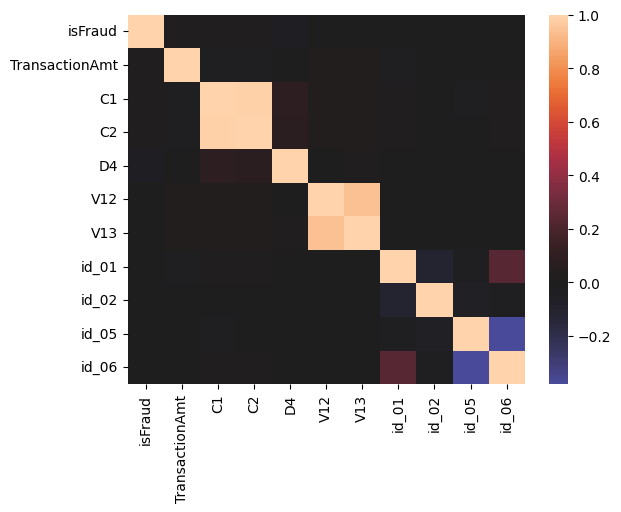

In [91]:
sns.heatmap(train_df.corr(numeric_only=True), center=0)

In [92]:
#check data for test transaction
test_transaction_df.describe()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,9887.000000,10000.000000,9973.000000,9435.000000,9435.000000,5320.000000,...,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,3.668548e+06,1.857137e+07,141.004778,9881.547300,350.020229,151.135800,200.913567,290.093588,86.925808,85.361654,...,0.314410,762.294032,829.468705,785.138282,51.893741,97.276565,61.838428,140.043668,153.802038,145.963610
std,2.886896e+03,8.153642e+04,229.745361,4732.635688,157.487188,8.272896,39.808169,103.122407,1.901654,334.213240,...,1.220624,4749.048294,4756.373990,4749.245757,404.022138,448.342765,405.276613,856.042064,871.804271,864.893441
min,3.663549e+06,1.840322e+07,0.246000,1030.000000,100.000000,100.000000,100.000000,110.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.666049e+06,1.849519e+07,49.000000,6481.000000,194.000000,150.000000,166.000000,204.000000,87.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.668548e+06,1.857204e+07,77.000000,9500.000000,327.000000,150.000000,226.000000,299.000000,87.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.671048e+06,1.864099e+07,144.950000,13741.500000,490.000000,150.000000,226.000000,330.000000,87.000000,19.000000,...,0.000000,25.000000,100.000000,72.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.673548e+06,1.872084e+07,7777.490000,18385.000000,600.000000,223.000000,236.000000,536.000000,96.000000,8081.000000,...,11.000000,48480.000000,48480.000000,48480.000000,3600.000000,3600.000000,3600.000000,12000.000000,12000.000000,12000.000000


In [93]:
test_transaction_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print("Credit Card Fraud Detection data set of Test transaction -  rows:",test_transaction_df.shape[0]," columns:", test_transaction_df.shape[1])

Credit Card Fraud Detection data set of Test transaction -  rows: 10000  columns: 393


In [95]:
total = test_identity_df.isnull().sum().sort_values(ascending = False)
percent = (test_identity_df.isnull().sum()/test_identity_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,id-24,id-25,id-21,id-07,id-08,id-23,id-22,id-26,id-27,id-18,...,id-11,id-02,id-15,id-35,id-36,id-37,id-38,id-01,id-12,TransactionID
Total,9674.00,9649.00,9647.00,9647.00,9647.00,9646.00,9646.00,9646.00,9646.00,6440.0,...,288.00,280.0,279.00,279.00,279.00,279.00,279.00,0.0,0.0,0.0
Percent,96.74,96.49,96.47,96.47,96.47,96.46,96.46,96.46,96.46,64.4,...,2.88,2.8,2.79,2.79,2.79,2.79,2.79,0.0,0.0,0.0


In [141]:
#Test data preparation
test_trans_column = ['TransactionID','TransactionAmt','ProductCD','card4','P_emaildomain','C1','C2','D4','V12','V13']
test_id_column = ['id-01','id-02','id-05','id-06']

In [142]:
df_test_trans = test_transaction_df[test_trans_column].copy()
df_test_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   10000 non-null  int64  
 1   TransactionAmt  10000 non-null  float64
 2   ProductCD       10000 non-null  object 
 3   card4           9998 non-null   object 
 4   P_emaildomain   8245 non-null   object 
 5   C1              10000 non-null  float64
 6   C2              10000 non-null  float64
 7   D4              7873 non-null   float64
 8   V12             9423 non-null   float64
 9   V13             9423 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


In [143]:
df_test_identity = test_identity_df[test_id_column].copy()
df_test_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id-01   10000 non-null  float64
 1   id-02   9720 non-null   float64
 2   id-05   9488 non-null   float64
 3   id-06   9488 non-null   float64
dtypes: float64(4)
memory usage: 312.6 KB


In [144]:
#Join Transaction and Identity for test dataset
test_df = df_test_trans.merge(df_test_identity, how='left', left_index=True, right_index=True)

In [145]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   10000 non-null  int64  
 1   TransactionAmt  10000 non-null  float64
 2   ProductCD       10000 non-null  object 
 3   card4           9998 non-null   object 
 4   P_emaildomain   8245 non-null   object 
 5   C1              10000 non-null  float64
 6   C2              10000 non-null  float64
 7   D4              7873 non-null   float64
 8   V12             9423 non-null   float64
 9   V13             9423 non-null   float64
 10  id-01           10000 non-null  float64
 11  id-02           9720 non-null   float64
 12  id-05           9488 non-null   float64
 13  id-06           9488 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.1+ MB


In [146]:
#clean the numeric test data

#clean column D4
test_df = impute_median(test_df, 'D4')

#clean column id-02
test_df = impute_median(test_df, 'id-02')

#clean column id-05
test_df = impute_median(test_df, 'id-05')

#clean column id-06
test_df = impute_median(test_df, 'id-06')

#clean column V12
test_df = impute_median(test_df, 'V12')

#clean column V13
test_df = impute_median(test_df, 'V13')

In [147]:
#clean categorical data
test_df['card4'].value_counts()

card4
visa                6428
mastercard          3472
american express      58
discover              40
Name: count, dtype: int64

In [148]:
test_df['card4'] = test_df['card4'].fillna('visa')

In [149]:
#clean P_emaildomain
test_df['P_emaildomain'].value_counts()

P_emaildomain
gmail.com          4034
yahoo.com          1769
anonymous.com       541
hotmail.com         512
aol.com             498
icloud.com          106
comcast.net         105
att.net              94
msn.com              66
outlook.com          59
live.com             52
ymail.com            50
verizon.net          48
sbcglobal.net        46
bellsouth.net        38
cox.net              25
charter.net          18
mail.com             17
roadrunner.com       13
earthlink.net        12
me.com               11
optonline.net        10
netzero.net           9
gmail                 9
juno.com              8
yahoo.com.mx          7
centurylink.net       7
suddenlink.net        7
q.com                 6
rocketmail.com        6
cfl.rr.com            5
yahoo.fr              5
frontier.com          5
frontiernet.net       4
yahoo.de              4
cableone.net          4
hotmail.es            4
mac.com               3
windstream.net        3
netzero.com           3
twc.com               3
ai

In [150]:
test_df['P_emaildomain'] = test_df['P_emaildomain'].fillna('gmail.com')

In [151]:
test_df.isnull().sum()

TransactionID     0
TransactionAmt    0
ProductCD         0
card4             0
P_emaildomain     0
C1                0
C2                0
D4                0
V12               0
V13               0
id-01             0
id-02             0
id-05             0
id-06             0
dtype: int64

In [152]:
#Rename the column of test data as per train data
test_df.rename(
    columns={"id-01": "id_01", "id-02": "id_02", "id-05": "id_05", "id-06": "id_06"},
    inplace=True,
)

In [153]:
#categorical columns in traing data
numericCols = train_df._get_numeric_data().columns
categoricalCols = list(set(train_df) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)

The categorical columns in training data are:  ['P_emaildomain', 'card4', 'ProductCD']


In [154]:
test_df.columns

Index(['TransactionID', 'TransactionAmt', 'ProductCD', 'card4',
       'P_emaildomain', 'C1', 'C2', 'D4', 'V12', 'V13', 'id_01', 'id_02',
       'id_05', 'id_06'],
      dtype='object')

In [155]:
train_df.columns

Index(['isFraud', 'TransactionAmt', 'ProductCD', 'card4', 'P_emaildomain',
       'C1', 'C2', 'D4', 'V12', 'V13', 'id_01', 'id_02', 'id_05', 'id_06'],
      dtype='object')

In [156]:
#seperating the X and the Y from the dataset
X=train_df.loc[:, ['TransactionAmt', 'id_01', 'id_02', 'id_05', 'id_06', 'C1','C2','D4','V12','V13']]
Y=train_df["isFraud"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(9996, 10)
(9996,)


In [157]:
print(X_data.tolist())

[[68.5, 0.0, 70787.0, 0.0, 0.0, 1.0, 1.0, 88.0, 1.0, 1.0], [29.0, -5.0, 98945.0, 0.0, -5.0, 1.0, 1.0, 0.0, 0.0, 0.0], [59.0, -5.0, 191631.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0], [50.0, -5.0, 221832.0, 0.0, -6.0, 2.0, 5.0, 94.0, 1.0, 1.0], [50.0, 0.0, 7460.0, 1.0, 0.0, 1.0, 1.0, 88.0, 0.0, 0.0], [49.0, -5.0, 61141.0, 3.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0], [159.0, -15.0, 99010.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0], [422.5, 0.0, 31964.0, 0.0, -10.0, 1.0, 1.0, 0.0, 0.0, 0.0], [15.0, -10.0, 116098.0, 0.0, 0.0, 1.0, 1.0, 88.0, 0.0, 0.0], [117.0, -5.0, 257037.0, 0.0, 0.0, 2.0, 2.0, 318.0, 1.0, 1.0], [75.887, -5.0, 287959.0, 1.0, -11.0, 1.0, 4.0, 0.0, 0.0, 0.0], [16.495, 0.0, 88525.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [50.0, -5.0, 54927.0, 0.0, -1.0, 4.0, 2.0, 107.0, 1.0, 1.0], [40.0, 0.0, 69542.0, 2.0, -4.0, 6.0, 5.0, 45.0, 0.0, 0.0], [10.5, 0.0, 132356.0, 1.0, -6.0, 1.0, 1.0, 0.0, 0.0, 0.0], [57.95, 0.0, 275611.0, 0.0, 0.0, 4.0, 4.0, 88.0, 0.0, 0.0], [30.0, -5.0, 419136.0, 0.0, 0.0, 1.0, 1.0, 

In [158]:
X_train = X_data
Y_train = Y_data

In [159]:
print(Y_train.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [160]:
X1=test_df.loc[:, ['TransactionAmt', 'id_01', 'id_02', 'id_05', 'id_06', 'C1','C2','D4','V12','V13']]
X_test = X1.values
X_test

array([[ 3.19500e+01, -4.50000e+01,  2.80290e+05, ...,  3.98000e+02,
         0.00000e+00,  0.00000e+00],
       [ 4.90000e+01,  0.00000e+00,  3.57900e+03, ...,  6.34000e+02,
         1.00000e+00,  1.00000e+00],
       [ 1.71000e+02, -5.00000e+00,  1.85210e+05, ...,  9.70000e+01,
         1.00000e+00,  1.00000e+00],
       ...,
       [ 1.03950e+02,  0.00000e+00,  4.39200e+03, ...,  0.00000e+00,
         1.00000e+00,  1.00000e+00],
       [ 3.90000e+01, -5.00000e+00,  4.12102e+05, ...,  4.80000e+01,
         1.00000e+00,  1.00000e+00],
       [ 3.59500e+01, -5.00000e+00,  1.37743e+05, ...,  6.98000e+02,
         0.00000e+00,  0.00000e+00]])

In [161]:
# random forest model creation
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [162]:
#y_pred
print(y_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [163]:
#Cross validation to get model performance score
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(rfc, X, Y, cv=5)
scores

array([0.9735    , 0.97348674, 0.97348674, 0.97348674, 0.97348674])

In [164]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
#from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
#from sklearn.metrics import confusion_matrix

'''
Fraud = train_df[train_df['isFraud'] == 1]
Valid = train_df[train_df['isFraud'] == 0]
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
#MCC=matthews_corrcoef(Y_test,y_pred)
#print("The Matthews correlation coefficient is {}".format(MCC))

'''

'\nFraud = train_df[train_df[\'isFraud\'] == 1]\nValid = train_df[train_df[\'isFraud\'] == 0]\nn_outliers = len(Fraud)\nn_errors = (y_pred != Y_test).sum()\nprint("The model used is Random Forest classifier")\nacc= accuracy_score(Y_test,y_pred)\nprint("The accuracy is  {}".format(acc))\nprec= precision_score(Y_test,y_pred)\nprint("The precision is {}".format(prec))\nrec= recall_score(Y_test,y_pred)\nprint("The recall is {}".format(rec))\nf1= f1_score(Y_test,y_pred)\nprint("The F1-Score is {}".format(f1))\n#MCC=matthews_corrcoef(Y_test,y_pred)\n#print("The Matthews correlation coefficient is {}".format(MCC))\n\n'

In [165]:
#printing the confusion matrix For Random forest classifier
'''
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
'''

'\nLABELS = [\'Normal\', \'Fraud\']\nconf_matrix = confusion_matrix(Y_test, y_pred)\nplt.figure(figsize=(5, 5))\nsns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");\nplt.title("Confusion matrix")\nplt.ylabel(\'True class\')\nplt.xlabel(\'Predicted class\')\nplt.show()\n\n# Run classification metrics\nplt.figure(figsize=(9, 7))\nprint(\'{}: {}\'.format("Random Forest", n_errors))\nprint(accuracy_score(Y_test, y_pred))\nprint(classification_report(Y_test, y_pred))\n'

In [166]:
#Logistic regression
X1=test_df.loc[:, ['TransactionAmt', 'id_01', 'id_02', 'id_05', 'id_06', 'C1','C2','D4','V12','V13']]
X_test=X1.values
lr = LogisticRegression(random_state = 0)

In [167]:
#training model
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [168]:
#predicting values
lr_yhat = lr.predict(X_test)

In [169]:
print(lr_yhat.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [170]:
#Cross validation
scores1 = cross_val_score(lr, X, Y, cv=5)
scores1

array([0.9735    , 0.97348674, 0.97298649, 0.97348674, 0.97348674])

In [171]:
#print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, lr_yhat)))
"""
n_outliers = len(Fraud)
n_errors = (lr_yhat != Y_test).sum()
print("The model used is Logistic Regression")
acc1= accuracy_score(Y_test,lr_yhat)
print("The accuracy is  {}".format(acc1))
prec1= precision_score(Y_test,lr_yhat)
print("The precision is {}".format(prec1))
rec1= recall_score(Y_test,lr_yhat)
print("The recall is {}".format(rec1))
f11= f1_score(Y_test,lr_yhat)
print("The F1-Score is {}".format(f11))
"""
#MCC=matthews_corrcoef(Y_test,y_pred)
#print("The Matthews correlation coefficient is {}".format(MCC))

'\nn_outliers = len(Fraud)\nn_errors = (lr_yhat != Y_test).sum()\nprint("The model used is Logistic Regression")\nacc1= accuracy_score(Y_test,lr_yhat)\nprint("The accuracy is  {}".format(acc1))\nprec1= precision_score(Y_test,lr_yhat)\nprint("The precision is {}".format(prec1))\nrec1= recall_score(Y_test,lr_yhat)\nprint("The recall is {}".format(rec1))\nf11= f1_score(Y_test,lr_yhat)\nprint("The F1-Score is {}".format(f11))\n'

In [172]:
#printing the confusion matrix for Logistic regression
"""
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
"""

# Run classification metrics
#plt.figure(figsize=(9, 7))
#print('{}: {}'.format("Logistic Regression", n_errors))
#print(accuracy_score(Y_test, y_pred))
#print(classification_report(Y_test, y_pred))

'\nLABELS = [\'Normal\', \'Fraud\']\nconf_matrix = confusion_matrix(Y_test, y_pred)\nplt.figure(figsize=(5, 5))\nsns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");\nplt.title("Confusion matrix")\nplt.ylabel(\'True class\')\nplt.xlabel(\'Predicted class\')\nplt.show()\n'

In [173]:
#known_variable = []
known_variable = ['TransactionAmt', 'id_01', 'id_02', 'id_05', 'id_06', 'C1','C2','D4','V12','V13']

df_result = rfc.predict(test_df[known_variable])
df_result['TransactionID'] = test_df['TransactionID']
df_result.to_csv("../data/final/submission.csv", index=False)
df_result.head()
print("Run Completed!")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices